# sklearn-LDA

代码示例：https://mp.weixin.qq.com/s/hMcJtB3Lss1NBalXRTGZlQ （玉树芝兰） <br>
可视化：https://blog.csdn.net/qq_39496504/article/details/107125284  <br>
sklearn lda参数解读:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
<br>中文版参数解读：https://blog.csdn.net/TiffanyRabbit/article/details/76445909
<br>LDA原理-视频版：https://www.bilibili.com/video/BV1t54y127U8
<br>LDA原理-文字版：https://www.jianshu.com/p/5c510694c07e
<br>score的计算方法：https://github.com/scikit-learn/scikit-learn/blob/844b4be24d20fc42cc13b957374c718956a0db39/sklearn/decomposition/_lda.py#L729
<br>主题困惑度1：https://blog.csdn.net/weixin_43343486/article/details/109255165
<br>主题困惑度2：https://blog.csdn.net/weixin_39676021/article/details/112187210

## 1.预处理

In [1]:
import os
import pandas as pd
import re
import jieba
import jieba.posseg as psg

In [2]:
output_path = 'D:/python_ex/lda/result'
file_path = 'D:/python_ex/lda/data'
os.chdir(file_path)
data=pd.read_excel("data.xlsx")
#content type
os.chdir(output_path)
dic_file = "D:/python/lda/stop_dic/dict.txt"
stop_file = "D:/python/lda/stop_dic/stopwords.txt"

In [3]:
def chinese_word_cut(mytext):
    jieba.load_userdict(dic_file)
    jieba.initialize()
    try:
        stopword_list = open(stop_file,encoding ='utf-8')
    except:
        stopword_list = []
        print("error in stop_file")
    stop_list = []
    flag_list = ['n','nz','vn']
    for line in stopword_list:
        line = re.sub(u'\n|\\r', '', line)
        stop_list.append(line)
    
    word_list = []
    #jieba分词
    seg_list = psg.cut(mytext)
    for seg_word in seg_list:
        #word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        word = seg_word.word  #如果想要分析英语文本，注释这行代码，启动下行代码
        find = 0
        for stop_word in stop_list:
            if stop_word == word or len(word)<2:     #this word is stopword
                    find = 1
                    break
        if find == 0 and seg_word.flag in flag_list:
            word_list.append(word)      
    return (" ").join(word_list)

In [4]:
data['content'] = data['content'].astype(str)
data["content_cutted"] = data.content.apply(chinese_word_cut)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\17888\AppData\Local\Temp\jieba.cache
Loading model cost 1.985 seconds.
Prefix dict has been built successfully.


## 2.LDA分析

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [7]:
def print_top_words(model, feature_names, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        tword.append(topic_w)
        print(topic_w)
    return tword

In [10]:
n_features = 1000 #提取1000个特征词语
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(data.content_cutted)

In [28]:
n_topics = 4
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='batch',
                                learning_offset=50,
#                                 doc_topic_prior=0.1,
#                                 topic_word_prior=0.01,
                               random_state=0)
lda.fit(tf)

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(learning_offset=50, max_iter=50, n_components=4,
                          random_state=0)

### 2.1输出每个主题对应词语 

In [29]:
n_top_words = 25
tf_feature_names = tf_vectorizer.get_feature_names()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
基准利率 债券 小额 债券市场 正回购 宏观调控 价格 办法 农业贷款 住房贷款 条件 历史 国债 购汇 借款 规定 区间 方案 总额 账户 盈利 包袱 限额 手段 法定
Topic #1:
增幅 独资 供应量 顺差 结售汇 出口 程度 比重 本外币 外汇储备 储蓄 原因 变动 收支 报告 住房贷款 利率政策 目标 投向 国债 外币存款 大量 保持稳定 价格 趋势
Topic #2:
借贷 常备 定向 抵押 精准 框架 供给 动用 结构性 民营企业 开发性 系统 传导 自律 支小 中标 存单 存量 报价 防控 债券 制造业 金融风险 绿色 创业
Topic #3:
基准利率 正回购 国库 金额 出口 节奏 动态 现金管理 调整机制 外债 合格 县域 针对性 微调 民生 住房 事业部 可控性 渐进性 产权制度 账户 外汇资金 灵活性 结售汇 季度


D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
import numpy as np
n_top_words
tf_feature_names = tf_vectorizer.get_feature_names()
id=0
tt_matrix = lda.components_/ lda.components_.sum(axis=1)[:, np.newaxis]
#tt_matrix = lda.components_
ans = pd.DataFrame()
for tt_m in tt_matrix:
    tt_dict = [[name, tt] for name, tt in zip(tf_feature_names, tt_m)]
    
    tt_dict = sorted(tt_dict, key=lambda x: x[1], reverse=True)
    tt_dict = np.array(tt_dict)
    # 打印权重值大于0.6的主题词：
    # tt_dict = [tt_threshold for tt_threshold in tt_dict if tt_threshold[1] > 0.6]
    # 打印每个类别前n_top_words个主题词：
    tt_dict = tt_dict[:n_top_words]
    ans_sub = pd.DataFrame({'主题'+str(id):tt_dict[:,0],'概率':tt_dict[:,1]})
    ans = pd.concat([ans,ans_sub],axis=1)
    print('主题%d:' %(id), tt_dict,end="\n")
    id += 1
ans.to_excel("主题词语概率输出.xlsx",index=False)

主题0: [['基准利率' '0.024486383891978457']
 ['债券' '0.01884930574419684']
 ['小额' '0.014849221485562438']
 ['债券市场' '0.013051854033783658']
 ['正回购' '0.012581554023791457']
 ['宏观调控' '0.012548138980820451']
 ['价格' '0.012287905065690198']
 ['办法' '0.012213487660749802']
 ['农业贷款' '0.011818373565914458']
 ['住房贷款' '0.011501130160144042']
 ['条件' '0.010190226803205053']
 ['历史' '0.00986666080902331']
 ['国债' '0.009306393431615071']
 ['购汇' '0.009012018397869958']
 ['借款' '0.008990216466964915']
 ['规定' '0.008764327088053966']
 ['区间' '0.008732731414868139']
 ['方案' '0.008681159695557774']
 ['总额' '0.008586997193802008']
 ['账户' '0.008560781181993448']
 ['盈利' '0.008487791079639028']
 ['包袱' '0.008411267172068656']
 ['限额' '0.008299134842872358']
 ['手段' '0.008163845896893559']
 ['法定' '0.008076294718019147']]
主题1: [['增幅' '0.036403737570392274']
 ['独资' '0.03531456786570401']
 ['供应量' '0.03470663465632853']
 ['顺差' '0.028955905949906005']
 ['结售汇' '0.025457668179813216']
 ['出口' '0.020272497757784932']
 ['程度' '0.017911263

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2.2输出每篇文章对应主题 

In [30]:
import numpy as np

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
topics=lda.transform(tf)

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
topic = []
for t in topics:
    topic.append("Topic #"+str(list(t).index(np.max(t))))
data['概率最大的主题序号']=topic
data['每个主题对应概率']=list(topics)
data.to_excel("data_topic.xlsx",index=False)

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2.3可视化 

In [33]:
import pyLDAvis
import pyLDAvis.sklearn

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
pyLDAvis.enable_notebook()
pic = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
pyLDAvis.display(pic)
pyLDAvis.save_html(pic, 'lda_pass'+str(n_topics)+'.html')
pyLDAvis.display(pic)
#去工作路径下找保存好的html文件
#和视频里讲的不一样，目前这个代码不需要手动中断运行，可以快速出结果

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2.4困惑度 

In [18]:
import matplotlib.pyplot as plt

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
plexs = []
scores = []
n_max_topics = 16
for i in range(1,n_max_topics):
    print(i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [26]:
plexs

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[348.36172121170887,
 296.50181838354194,
 284.2763943825207,
 282.422788411272,
 282.43046469151665,
 288.47361341755925,
 290.34955860494836,
 293.8245956140722,
 295.65281534752836,
 297.187339416463,
 302.0415638963575,
 305.5482931571877,
 305.98820179112903,
 306.9287190255331,
 304.70269491845136]

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


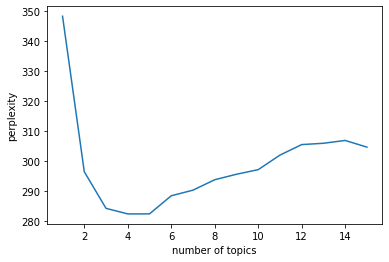

In [27]:
n_t=15#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t+1))
plt.plot(x,plexs[0:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


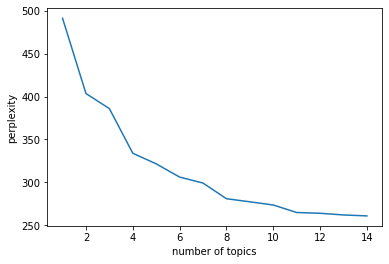

In [34]:
n_t=15#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t))
plt.plot(x,plexs[1:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

<font color='red'> 下边的这个分数暂时没有搞懂是做什么用的 </font>

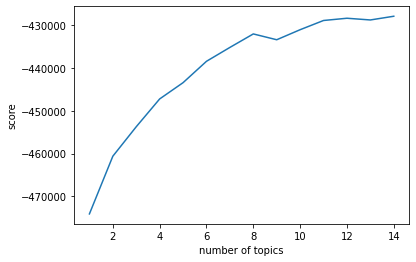

In [61]:
n_t=15#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t))
plt.plot(x,scores[1:n_t])
plt.xlabel("number of topics")
plt.ylabel("score")
plt.show()